In [1]:
import cv2 
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import string
from tensorflow import keras
from tensorflow.keras import models,layers
from keras.utils import to_categorical

2024-08-04 08:09:56.886816: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 08:09:56.886956: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 08:09:57.047227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df='/kaggle/input/openned-closed-eyes/TrainingSet/TrainingSet'

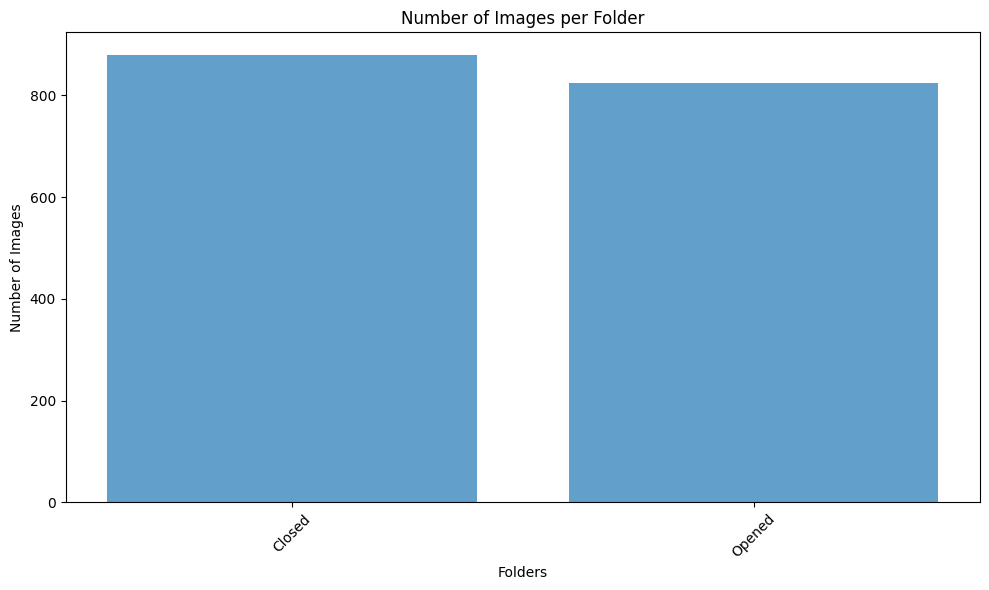

In [3]:

root_dir = '/kaggle/input/openned-closed-eyes/TrainingSet/TrainingSet'

folder_counts = {}


for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    
    if os.path.isdir(folder_path):
        num_images = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name)) and name.lower().endswith(('.png', '.jpg', '.jpeg'))])
        folder_counts[folder] = num_images

folders = list(folder_counts.keys())
counts = list(folder_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(range(len(folders)), counts, align='center', alpha=0.7)
plt.xticks(range(len(folders)), folders, rotation=45)
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images per Folder')
plt.tight_layout()
plt.show()


In [4]:
Closed = os.listdir(os.path.join(df, '/kaggle/input/openned-closed-eyes/TrainingSet/TrainingSet/Closed'))

Opened = os.listdir(os.path.join(df, '/kaggle/input/openned-closed-eyes/TrainingSet/TrainingSet/Opened'))

In [6]:
X=[]
Y=[]

In [7]:
for i, image_name in enumerate(Opened):
    file_path = os.path.join(df, '/kaggle/input/openned-closed-eyes/TrainingSet/TrainingSet/Opened', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(0)

In [8]:
for i, image_name in enumerate(Closed):
    file_path = os.path.join(df, '/kaggle/input/openned-closed-eyes/TrainingSet/TrainingSet/Closed', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(1)

In [9]:
labels=np.unique(Y)
print(labels)

[0 1]


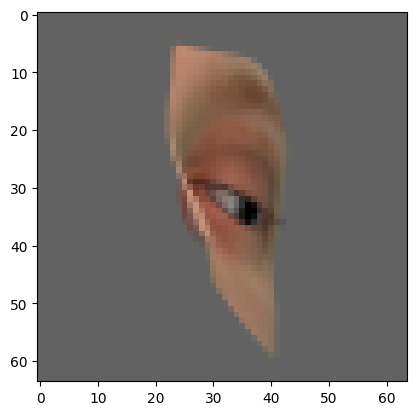

In [11]:
img_array=X[8]
plt.imshow(img_array)
plt.show()

In [12]:
len(X)

1704

In [13]:
len(Y)

1704

In [14]:
X=np.array(X)
Y=np.array(Y)

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [17]:
y_train.shape

(1363, 2)

In [18]:
x_train.shape

(1363, 64, 64, 3)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

num_classes = 2


model = Sequential()


model.add(Conv2D(32, (3,3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


batch_size = 32  
history=model.fit(x_train, y_train, batch_size=batch_size, verbose=1, epochs=10, validation_data=(x_test, y_test), shuffle=False)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.4854 - loss: 7.0866 - val_accuracy: 0.6246 - val_loss: 0.6875
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.5725 - loss: 0.6848 - val_accuracy: 0.6452 - val_loss: 0.6667
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6264 - loss: 0.6348 - val_accuracy: 0.8328 - val_loss: 0.4303
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8224 - loss: 0.4475 - val_accuracy: 0.8974 - val_loss: 0.2904
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8830 - loss: 0.3362 - val_accuracy: 0.9384 - val_loss: 0.1804
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9088 - loss: 0.3033 - val_accuracy: 0.9384 - val_loss: 0.1689
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9203 - loss: 0.2565 - val_accuracy: 0.9589 - val_loss: 0.1448
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9331 - loss: 0.2251 - val_accuracy: 0.9648 - v

In [24]:

model.save('Drowsiness_Detection _model_CNN.h5')

In [25]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.1355
Test Accuracy: 97.07%
